# This is a notebook which helps understand OT on signed measures

This method splits the measures to negative and positive, 

where $\mu_{+},\mu_{-} \in \mathbb{R}^{I}_{+}$ , $\nu_{+},\nu_{-} \in \mathbb{R}^{J}_{+}$ , $\{\text{supp}\{\mu_{+}\} \cap \text{supp}\{\mu_{-}\}\} = \{ \emptyset \}$ and $\{\text{supp}\{\nu_{+}\} \cap \text{supp}\{\nu_{-}\}\} = \{ \emptyset \}$.


\begin{equation}
\tag{$W$}
\mathbb{W}_{1}(\mu,\nu) = W_{1}(\mu_{+} ,\nu_{+}) \, + W_{1}(\mu_{-},\nu_{-}).
\end{equation}

## Example on gaussian distributions

In [26]:
from utils.Visualizations import *
import numpy as np
import ot

n_p = 100
n_q = 100
eps = 1.e-2
X,Y = np.linspace(0,1,n_p), np.linspace(0,1,n_q)

p = make_1D_gauss(n_p, np.floor(1 * n_p / 4.), 2.) + make_1D_gauss(n_p, np.floor(2 * n_p / 4.), 2.) * (-0.5)
q = make_1D_gauss(n_q, np.floor(5 * n_q / 8.), 2.) + make_1D_gauss(n_q, np.floor(7 * n_q / 8.), 2.) * (-0.5)

C = np.zeros([n_p,n_q],dtype=np.float64)

dist_f1 = lambda a,b : abs(a-b)
dist_f2 = lambda a,b : (a-b)**2
for it1 in range(n_p):
    for it2 in range(n_q):
        C[it1,it2] = dist_f2(X[it1],Y[it2])

## To work with the signed measures
p_pos, p_neg = split_signed_measure(p)
q_pos, q_neg = split_signed_measure(q)

In [86]:
from utils.Visualizations import *
import numpy as np
import ot

n_p = 7
n_q = 7
eps = 1.e-2
X,Y = np.linspace(0,1,n_p), np.linspace(0,1,n_q)

p = np.array([0,1,2,1,0,-1,0], dtype=np.float64)
q = np.array([0,-1,0,1,2,1,0], dtype=np.float64)

C = np.zeros([n_p,n_q],dtype=np.float64)

dist_f1 = lambda a,b : abs(a-b)
dist_f2 = lambda a,b : (a-b)**2
for it1 in range(n_p):
    for it2 in range(n_q):
        C[it1,it2] = dist_f2(X[it1],Y[it2])

## To work with the signed measures
p_pos, p_neg = split_signed_measure(p)
q_pos, q_neg = split_signed_measure(q)

In [87]:
K_t : np.ndarray = np.exp(C / (-eps))

In [88]:
transport_plan_pos, Transport_cost_pos = calc_transport_pot_emd(p_pos, q_pos, C)

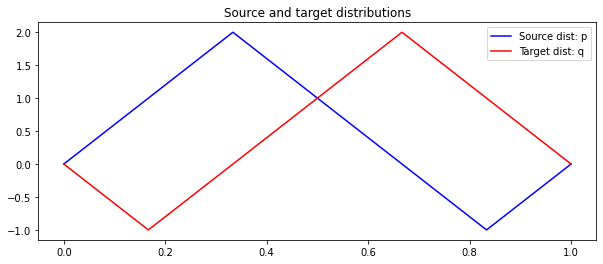

In [89]:
plot_distribution(X, p, q, title='Source and target distributions')

### Positives

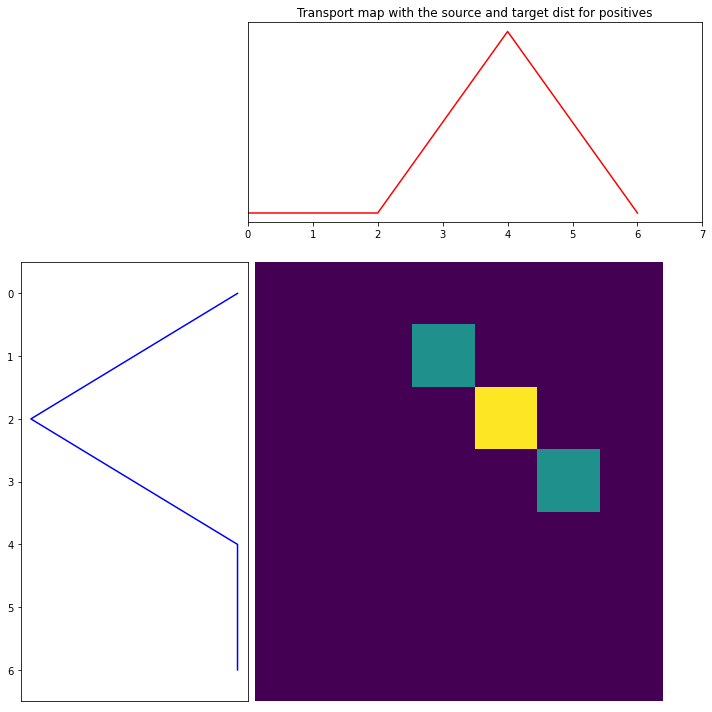

In [90]:
transport_plan_pos, transport_cost_pos = calc_transport_pot_emd(p_pos, q_pos, C)
plt.figure(figsize=(10,10))
plot1D_mat(p_pos, q_pos, transport_plan_pos,'Transport map with the source and target dist for positives')
plt.show()

### Negatives

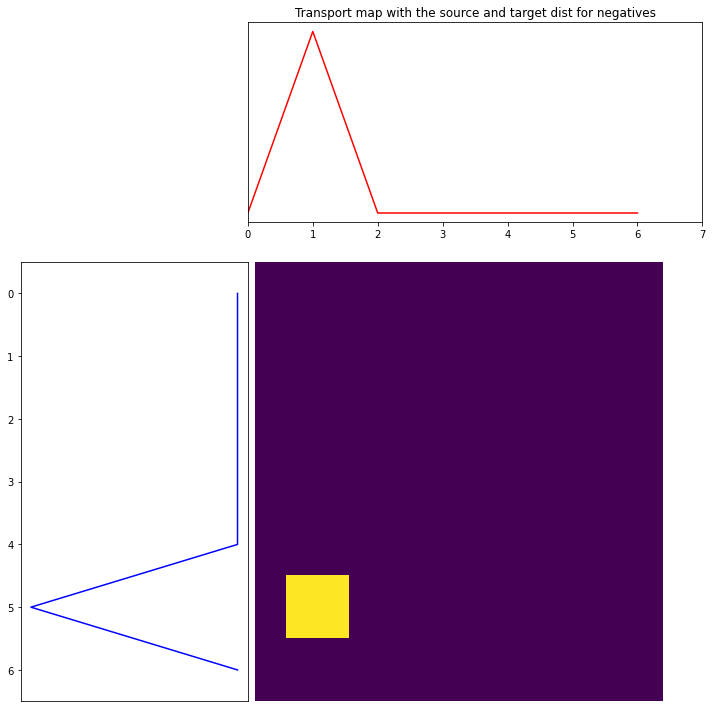

In [91]:
transport_plan_neg, transport_cost_neg = calc_transport_pot_emd(p_neg, q_neg, C)
plt.figure(figsize=(10,10))
plot1D_mat(p_neg, q_neg, transport_plan_neg,'Transport map with the source and target dist for negatives')
plt.show()

### United

In [92]:
transport_plan_united = transport_plan_pos + transport_plan_neg
transport_cost_united = transport_cost_pos + transport_cost_neg

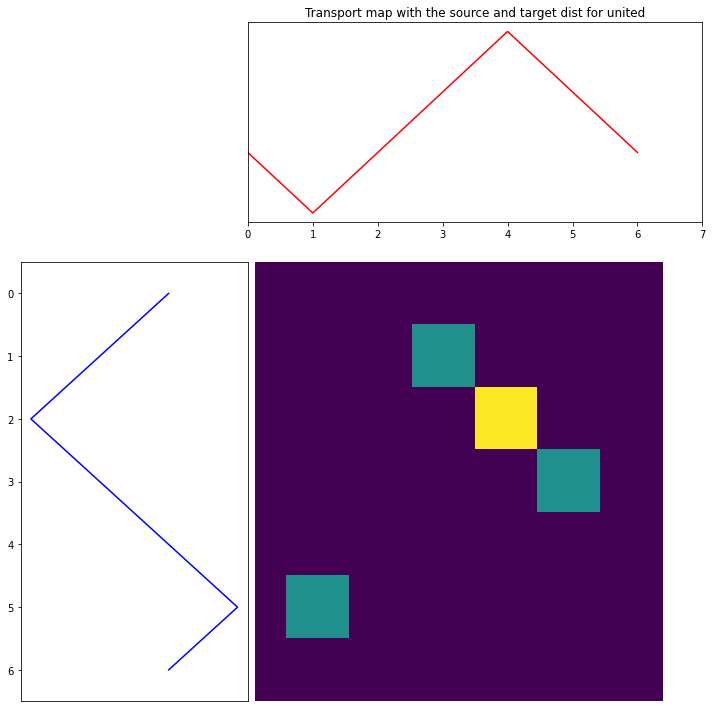

In [93]:
plt.figure(figsize=(10,10))
plot1D_mat(p, q, transport_plan_pos + transport_plan_neg,'Transport map with the source and target dist for united')
plt.show()

### Trying to define 
\begin{equation}
\mu = \mu_{+} - \mu_{-}
\quad \text{and} \quad 
\nu = \nu_{+} - \nu_{-}\, ,
\end{equation}

where $\mu_{+},\mu_{-} \in \mathbb{R}^{I}_{+}$ , $\nu_{+},\nu_{-} \in \mathbb{R}^{J}_{+}$ , $\{\text{supp}\{\mu_{+}\} \cap \text{supp}\{\mu_{-}\}\} = \{ \emptyset \}$ and $\{\text{supp}\{\nu_{+}\} \cap \text{supp}\{\nu_{-}\}\} = \{ \emptyset \}$.

The RGWD for signed measures will be defined as follows:

\begin{equation}
\tag{$W$}
\mathbb{W}_{1}^{\lambda, \epsilon}(\mu,\nu) = W_{1}^{\lambda, \epsilon}(\mu_{+} + \nu_{-} , \mu_{-} + \nu_{+}) \, .
\end{equation}

### Instead of the defined wasserstein distance in the article, I will use the transport plans I got here, for visualization

In [94]:
p_new = p_pos + q_neg
q_new = q_pos + p_neg

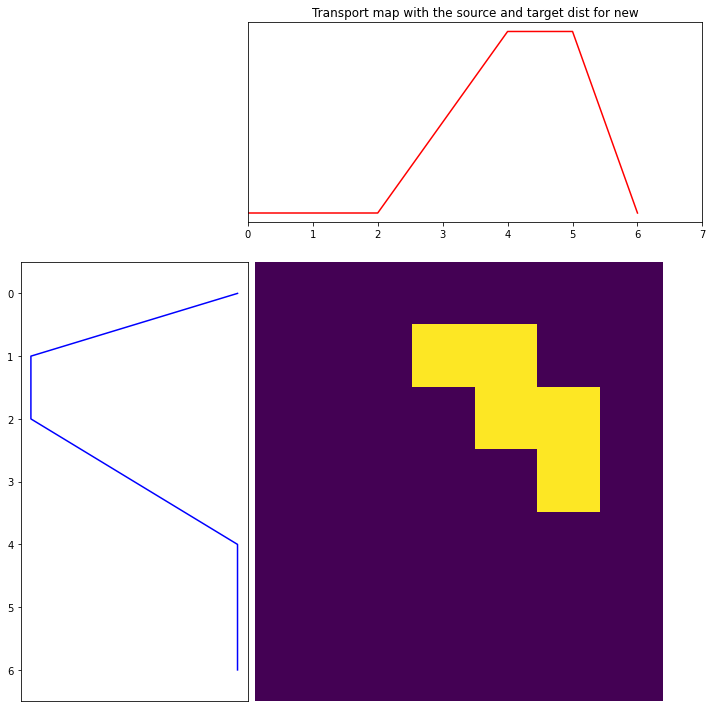

In [95]:
transport_plan_new, transport_cost_new = calc_transport_pot_emd(p_new, q_new, C)
plt.figure(figsize=(10,10))
plot1D_mat(p_new, q_new, transport_plan_new,'Transport map with the source and target dist for new')
plt.show()

We see a very big difference between the plans and I'm not sure we should be. This does not seem like the optimal way to perform this calculation. Think about how we could test whether these are legit.

## Lift by minimum

In [96]:
min_amount = min(min(p), min(q))
print(min_amount)

-1.0


In [97]:
p_lifted = p - min_amount
q_lifted = q - min_amount

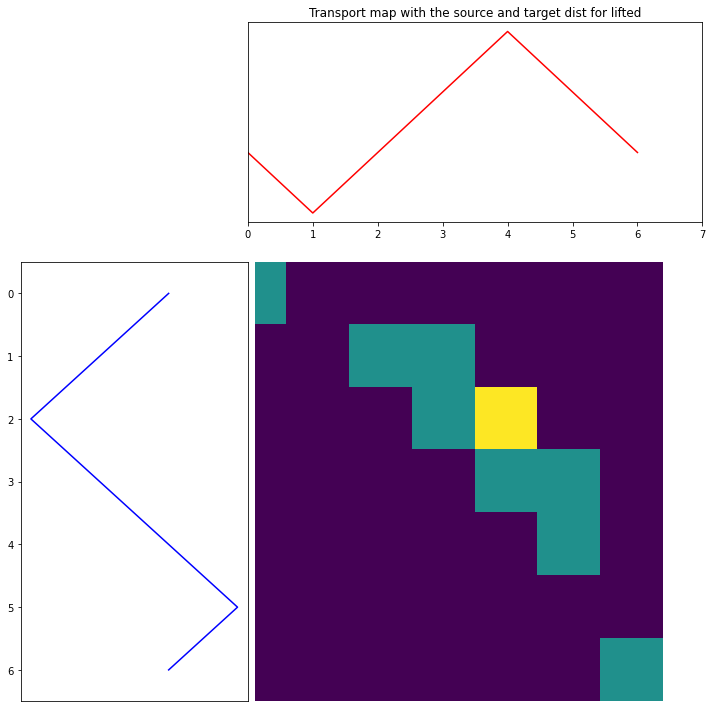

In [98]:
transport_plan_lifted, transport_cost_lifted = calc_transport_pot_emd(p_lifted, q_lifted, C)
plt.figure(figsize=(10,10))
plot1D_mat(p_lifted, q_lifted, transport_plan_lifted,'Transport map with the source and target dist for lifted')
plt.show()

In [99]:
def plot_transport_map(p, q, Transport_plan, title):
    plt.figure(figsize=(8, 8))
    plot1D_mat(p, q, Transport_plan, title)
    plt.show()

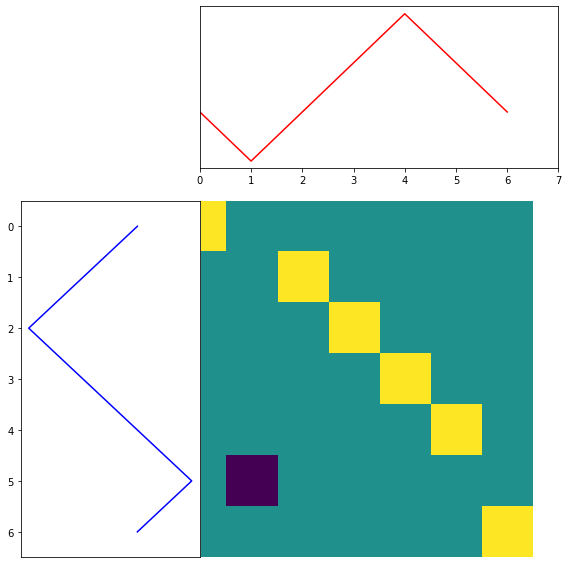

In [100]:
plot_transport_map(p,q,transport_plan_lifted - transport_plan_united, "")

In [101]:
print(transport_cost_lifted)

0.5555555555555555


In [102]:
print(transport_cost_united)

0.8888888888888888


In [103]:
print(transport_cost_new)

0.8333333333333333
